<a href="https://colab.research.google.com/github/tzujohsu/finance-podcast-RAG/blob/main/transcribe_podcast_and_punctuation_restoration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install whisper
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer
import whisper
model = whisper.load_model("turbo")

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-fe8qk90n
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-fe8qk90n
  Resolved https://github.com/openai/whisper.git to commit 90db0de1896c23cbfaf0c58bc2d30665f709f170
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20240930-py3-none-any.whl size=803583 sha256=4347181b28d96083f192fc98811bf7d86e91c5ace79b0ef83edd1bdd44760e7e
  Stored in directory: /tmp/pip-ephem-wheel-cache-58ug4vdb/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 41.0 MB/s eta 0:00:00


In [ ]:
import time
import random
from tqdm import tqdm

### Get download episode, data and urls

In [ ]:
import requests

def download_file(url, filename):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        with open(filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)
        print(f"File downloaded successfully to {filename}")
    except requests.exceptions.RequestException as e:
        print(f"Error downloading file: {e}")


In [ ]:
# https://filesb.soundon.fm/file/filesb/d0fd9286-bef2-4f77-820c-9d3f495b9729.mp3

In [ ]:
from bs4 import BeautifulSoup
import requests

def get_html_and_parse(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an exception for bad status codes

        soup = BeautifulSoup(response.content, "html.parser")
        return soup
    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL: {e}")
        return None

In [ ]:

podcast_lis = []
dates = []
MAXPAGE = 27 # maximum page of that podcast
for i in range(1, MAXPAGE): #
  base_url = f"https://www.podbean.com/site/EpisodeDownload/DIR22A45531XNJ5X?ajax=yw0&page={i}&page{i}="
  soup = get_html_and_parse(base_url)
  time.sleep(random.random())
  if soup:
      for link in soup.find_all('a'):
        l = link.get('href')
        if l and l.startswith('https://chtbl.com/track/') and l nt in podcast_lis:
          podcast_lis.append(l)
      for date_elements in soup.find_all(class_="date"):
        for element in date_elements:
          date = element.text.strip()
          if date[:4].isdigit() and date not in dates:
            dates.append(date)

print(len(podcast_lis), len(dates))
# not capturing the latest date
dates.append('2024-12-07')
print(len(podcast_lis), len(dates))

(512, 511)

In [ ]:
import pandas as pd
res = pd.DataFrame({
    'episode': range(len(podcast_lis), 0, -1),
    'date': dates,
    'url': podcast_lis
})
res.to_csv('goodaye_podcast_urls.csv', index = False)

### download audio and transcribe to txt

In [ ]:
import pandas as pd
res = pd.read_csv('/content/goodaye_podcast_urls.csv')

In [ ]:
from tqdm import tqdm
import requests
def download_file(url, date, episode):
  try:
    response = requests.get(url, stream=True)
    response.raise_for_status()  # Raise an exception for bad status codes
  except requests.exceptions.RequestException as e:
    print(f"{date}-{episode} Error downloading file: {e}")

  try:
    with open(f'gooaye-{episode}_{date}.mp3', 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    result = model.transcribe(f'gooaye-{episode}_{date}.mp3')
  except:
    print(f"{date}-{episode} Error transcribing file")

  with open(f'text/gooaye-{episode}_{date}.txt', 'w') as file:
    file.write(result['text'])


In [ ]:
import os
if not os.path.exists('text'):
    os.makedirs('text')

In [ ]:
for i in tqdm(range(53, 73)):
  url = res.loc[i, 'url']
  date = res.loc[i, 'date']
  episode = res.loc[i, 'episode']
  print(f'Processing Episode {episode}..')
  download_file(url, date, episode)

  0%|          | 0/20 [00:00<?, ?it/s]

Processing Episode 459..


  5%|▌         | 1/20 [03:51<1:13:18, 231.50s/it]

Processing Episode 458..


 10%|█         | 2/20 [07:45<1:09:52, 232.94s/it]

Processing Episode 457..


 15%|█▌        | 3/20 [11:39<1:06:08, 233.45s/it]

Processing Episode 456..


 20%|██        | 4/20 [15:30<1:01:58, 232.43s/it]

Processing Episode 455..


 25%|██▌       | 5/20 [19:16<57:32, 230.20s/it]  

Processing Episode 454..


 30%|███       | 6/20 [23:16<54:29, 233.56s/it]

Processing Episode 453..


 35%|███▌      | 7/20 [27:14<50:54, 234.93s/it]

Processing Episode 452..


 40%|████      | 8/20 [31:08<46:57, 234.78s/it]

Processing Episode 451..


 45%|████▌     | 9/20 [34:54<42:30, 231.91s/it]

Processing Episode 450..


 50%|█████     | 10/20 [38:57<39:14, 235.46s/it]

Processing Episode 449..


 55%|█████▌    | 11/20 [42:53<35:19, 235.52s/it]

Processing Episode 448..


 60%|██████    | 12/20 [46:41<31:04, 233.09s/it]

Processing Episode 447..


 65%|██████▌   | 13/20 [50:40<27:25, 235.12s/it]

Processing Episode 446..


 70%|███████   | 14/20 [54:37<23:33, 235.60s/it]

Processing Episode 445..


 75%|███████▌  | 15/20 [58:36<19:43, 236.60s/it]

Processing Episode 444..


 80%|████████  | 16/20 [1:02:27<15:40, 235.06s/it]

Processing Episode 443..


 85%|████████▌ | 17/20 [1:06:22<11:44, 234.90s/it]

Processing Episode 442..


 90%|█████████ | 18/20 [1:10:06<07:43, 231.73s/it]

Processing Episode 441..


 95%|█████████▌| 19/20 [1:13:56<03:51, 231.10s/it]

Processing Episode 440..


100%|██████████| 20/20 [1:17:55<00:00, 233.79s/it]


In [ ]:
# prompt: download the folder

from google.colab import files
import shutil
import os

def download_folder(folder_path):
  """Downloads a folder from the Colab workspace.

  Args:
      folder_path: The path to the folder to download.
  """
  try:
    shutil.make_archive(folder_path, 'zip', folder_path)  # Create a zip archive
    files.download(f'{folder_path}.zip')  # Download the zip file
    print(f"Folder '{folder_path}' downloaded successfully as '{folder_path}.zip'")

  except FileNotFoundError:
    print(f"Error: Folder '{folder_path}' not found.")
  except Exception as e:
    print(f"An error occurred: {e}")

# Example usage: replace 'your_folder' with the actual folder name
download_folder('text')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Folder 'text' downloaded successfully as 'text.zip'


### Punctuation Restoration

In [ ]:
with open('gooaye-498_2024-10-16.txt', 'r') as file:
    text = file.read()

In [ ]:
!pip install zhpr
!pip install pytorch_lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 41.1 MB/s eta 0:00:00


In [ ]:
from zhpr.predict import DocumentDataset,merge_stride,decode_pred
from transformers import AutoModelForTokenClassification,AutoTokenizer
from torch.utils.data import DataLoader

def predict_step(batch,model,tokenizer):
        batch_out = []
        batch_input_ids = batch

        encodings = {'input_ids': batch_input_ids}
        output = model(**encodings)

        predicted_token_class_id_batch = output['logits'].argmax(-1)
        for predicted_token_class_ids, input_ids in zip(predicted_token_class_id_batch, batch_input_ids):
            out=[]
            tokens = tokenizer.convert_ids_to_tokens(input_ids)

            # compute the pad start in input_ids
            # and also truncate the predict
            # print(tokenizer.decode(batch_input_ids))
            input_ids = input_ids.tolist()
            try:
                input_id_pad_start = input_ids.index(tokenizer.pad_token_id)
            except:
                input_id_pad_start = len(input_ids)
            input_ids = input_ids[:input_id_pad_start]
            tokens = tokens[:input_id_pad_start]

            # predicted_token_class_ids
            predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids]
            predicted_tokens_classes = predicted_tokens_classes[:input_id_pad_start]

            for token,ner in zip(tokens,predicted_tokens_classes):
                out.append((token,ner))
            batch_out.append(out)
        return batch_out

In [ ]:
# configuration
window_size = 256
step = 200
model_name = 'p208p2002/zh-wiki-punctuation-restore'
model = AutoModelForTokenClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.14k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [ ]:
import re

def replace_english_with_placeholders(text):
    """
    Replaces English text in a mixed Chinese-English input with numbered placeholders.

    Args:
        text (str): Input text containing both Chinese and English.

    Returns:
        tuple: Processed text with placeholders and a mapping of placeholders to English text.
    """
    # Find all English segments
    english_texts = re.findall(r'[a-zA-Z0-9\\s]+', text)
    placeholder_mapping = {}

    # Replace in one pass
    def replacer(match):
        nonlocal placeholder_mapping
        eng_text = match.group(0)
        placeholder = f"<{len(placeholder_mapping) + 1}>"
        placeholder_mapping[placeholder] = eng_text.strip()
        return placeholder

    processed_text = re.sub(r'[a-zA-Z0-9\\s]+', replacer, text)

    return processed_text, placeholder_mapping


def restore_english_from_placeholders(processed_text, placeholder_mapping):
    """
    Restores English text in a processed text by replacing placeholders with original English strings.

    Args:
        processed_text (str): Text with numbered placeholders.
        placeholder_mapping (dict): Mapping of placeholders to English text.

    Returns:
        str: Text with placeholders replaced by the original English text.
    """
    for placeholder, eng_text in placeholder_mapping.items():
        processed_text = processed_text.replace(placeholder, eng_text)

    return processed_text

def replace_unk_with_space(text):
    return re.sub(r"\[UNK]", " ", text)

# Example usage
# input_text = "哈咯你好嗎衷心感謝"
# processed_text, mapping = replace_english_with_placeholders(input_text)
# print("Processed Text:", processed_text)
# print("Mapping:", mapping)

In [ ]:
from tqdm import tqdm

In [ ]:
processed_text, mapping = replace_english_with_placeholders(text)
dataset = DocumentDataset(processed_text,window_size=window_size,step=step)
dataloader = DataLoader(dataset=dataset,shuffle=False,batch_size=10)
model_pred_out = []
for batch in tqdm(dataloader):
    batch_out = predict_step(batch,model,tokenizer)
    for out in batch_out:
        model_pred_out.append(out)

merge_pred_result = merge_stride(model_pred_out,step)
merge_pred_result_deocde = decode_pred(merge_pred_result)
merge_pred_result_deocde = ''.join(merge_pred_result_deocde)
restored_text = restore_english_from_placeholders(
    merge_pred_result_deocde,
    mapping
)
restored_text = replace_unk_with_space(restored_text)
print("Restored Text:", restored_text[:100])

### experimenting semantic level chunking

In [ ]:
import re

# Splitting the essay on '.', '?', and '!'

# single_sentences_list = re.split(r'(?<=[。！？])\s+', restored_text)
single_sentences_list = re.split(r'[。！？]', restored_text)
print (f"{len(single_sentences_list)} senteneces were found")

629 senteneces were found


In [ ]:
sentences = [{'sentence': x, 'index' : i} for i, x in enumerate(single_sentences_list)]
sentences[:3]

[{'sentence': '欢迎收听古爱 ', 'index': 0},
 {'sentence': '为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞',
  'index': 1},
 {'sentence': '有分男女和儿童不同体型设计，更适合我的体型去做', 'index': 2}]

In [ ]:
def combine_sentences(sentences, buffer_size=1):
    # Go through each sentence dict
    for i in range(len(sentences)):

        # Create a string that will hold the sentences which are joined
        combined_sentence = ''

        # Add sentences before the current one, based on the buffer size.
        for j in range(i - buffer_size, i):
            # Check if the index j is not negative (to avoid index out of range like on the first one)
            if j >= 0:
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += sentences[j]['sentence'] + ' '

        # Add the current sentence
        combined_sentence += sentences[i]['sentence']

        # Add sentences after the current one, based on the buffer size
        for j in range(i + 1, i + 1 + buffer_size):
            # Check if the index j is within the range of the sentences list
            if j < len(sentences):
                # Add the sentence at index j to the combined_sentence string
                combined_sentence += ' ' + sentences[j]['sentence']

        # Then add the whole thing to your dict
        # Store the combined sentence in the current sentence dict
        sentences[i]['combined_sentence'] = combined_sentence

    return sentences

sentences = combine_sentences(sentences)

In [ ]:
sentences[:3]

[{'sentence': '欢迎收听古爱 ',
  'index': 0,
  'combined_sentence': '欢迎收听古爱  为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞'},
 {'sentence': '为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞',
  'index': 1,
  'combined_sentence': '欢迎收听古爱  为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞 有分男女和儿童不同体型设计，更适合我的体型去做'},
 {'sentence': '有分男女和儿童不同体型设计，更适合我的体型去做',
  'index': 2,
  'combined_sentence': '为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞 有分男女和儿童不同体型设计，更适合我的体型去做 使用正确的坐姿可以有效地减少兼备腰的负担'}]

In [ ]:
# !pip install -U langchain-community
# from langchain.embeddings import OpenAIEmbeddings
# oaiembeds = OpenAIEmbeddings()
from sentence_transformers import SentenceTransformer
embedding_model = SentenceTransformer("TencentBAC/Conan-embedding-v1")
# embeddings = embedding_model.encode(sentences)

# similarities = embedding_model.similarity(embeddings, embeddings)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.24
    Uninstalling langchain-core-0.3.24:
      Successfully uninstalled langchain-core-0.3.24
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.2
    Uninstalling langchain-text-splitters-0.3.2:
      Successfully uninstalled langchain-text-splitters-0.3.2
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.11
    Uninstalling langchain-0.3.11:
      Successfully uninstalled langchain-0.3.11


modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/199 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/26.3k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.30G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.46k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/439k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/297 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/7.35M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/7.35M [00:00<?, ?B/s]

In [ ]:
# embeddings = oaiembeds.embed_documents([x['combined_sentence'] for x in sentences])
embeddings = embedding_model.encode([x['combined_sentence'] for x in sentences])

In [ ]:
for i, sentence in enumerate(sentences):
    sentence['combined_sentence_embedding'] = embeddings[i]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_distances(sentences):
    distances = []
    for i in range(len(sentences) - 1):
        embedding_current = sentences[i]['combined_sentence_embedding']
        embedding_next = sentences[i + 1]['combined_sentence_embedding']

        # Calculate cosine similarity
        similarity = cosine_similarity([embedding_current], [embedding_next])[0][0]

        # Convert to cosine distance
        distance = 1 - similarity

        # Append cosine distance to the list
        distances.append(distance)

        # Store distance in the dictionary
        sentences[i]['distance_to_next'] = distance

    # Optionally handle the last sentence
    # sentences[-1]['distance_to_next'] = None  # or a default value

    return distances, sentences

In [ ]:
distances, sentences = calculate_cosine_distances(sentences)
distances[:3]

[0.029030561447143555, 0.02323681116104126, 0.06683844327926636]

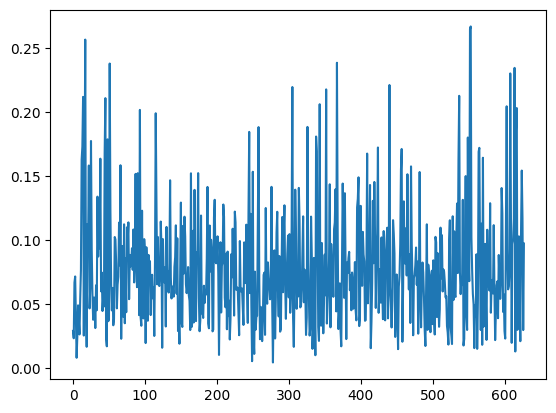

In [ ]:
import matplotlib.pyplot as plt

plt.plot(distances);

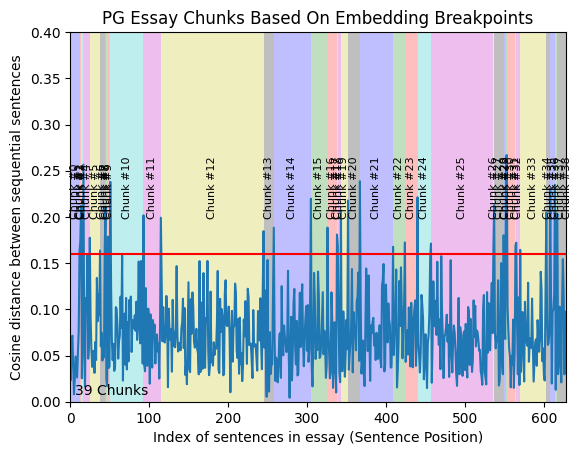

In [ ]:
import numpy as np

plt.plot(distances);

y_upper_bound = .4
plt.ylim(0, y_upper_bound)
plt.xlim(0, len(distances))

# We need to get the distance threshold that we'll consider an outlier
# We'll use numpy .percentile() for this
breakpoint_percentile_threshold = 94
breakpoint_distance_threshold = np.percentile(distances, breakpoint_percentile_threshold) # If you want more chunks, lower the percentile cutoff
plt.axhline(y=breakpoint_distance_threshold, color='r', linestyle='-');

# Then we'll see how many distances are actually above this one
num_distances_above_theshold = len([x for x in distances if x > breakpoint_distance_threshold]) # The amount of distances above your threshold
plt.text(x=(len(distances)*.01), y=y_upper_bound/50, s=f"{num_distances_above_theshold + 1} Chunks");

# Then we'll get the index of the distances that are above the threshold. This will tell us where we should split our text
indices_above_thresh = [i for i, x in enumerate(distances) if x > breakpoint_distance_threshold] # The indices of those breakpoints on your list

# Start of the shading and text
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, breakpoint_index in enumerate(indices_above_thresh):
    start_index = 0 if i == 0 else indices_above_thresh[i - 1]
    end_index = breakpoint_index if i < len(indices_above_thresh) - 1 else len(distances)

    plt.axvspan(start_index, end_index, facecolor=colors[i % len(colors)], alpha=0.25)
    plt.text(x=np.average([start_index, end_index]),
             y=breakpoint_distance_threshold + (y_upper_bound)/ 10,
             s=f"Chunk #{i}", horizontalalignment='center',
             rotation='vertical' , fontsize = 8)

# # Additional step to shade from the last breakpoint to the end of the dataset
if indices_above_thresh:
    last_breakpoint = indices_above_thresh[-1]
    if last_breakpoint < len(distances):
        plt.axvspan(last_breakpoint, len(distances), facecolor=colors[len(indices_above_thresh) % len(colors)], alpha=0.25)
        plt.text(x=np.average([last_breakpoint, len(distances)]),
                 y=breakpoint_distance_threshold + (y_upper_bound)/ 10,
                 s=f"Chunk #{i+1}",
                 rotation='vertical', fontsize = 8)

plt.title("PG Essay Chunks Based On Embedding Breakpoints")
plt.xlabel("Index of sentences in essay (Sentence Position)")
plt.ylabel("Cosine distance between sequential sentences")
plt.show()

In [ ]:
# Initialize the start index
start_index = 0

# Create a list to hold the grouped sentences
chunks = []

# Iterate through the breakpoints to slice the sentences
for index in indices_above_thresh:
    # The end index is the current breakpoint
    end_index = index

    # Slice the sentence_dicts from the current start index to the end index
    group = sentences[start_index:end_index + 1]
    combined_text = ' '.join([d['sentence'] for d in group])
    chunks.append(combined_text)

    # Update the start index for the next group
    start_index = index + 1

# The last group, if any sentences remain
if start_index < len(sentences):
    combined_text = ' '.join([d['sentence'] for d in sentences[start_index:]])
    chunks.append(combined_text)

# grouped_sentences now contains the chunked sentences

In [ ]:
for i, chunk in enumerate(chunks):
    buffer = 400

    print (f"Chunk #{i}")
    print (chunk[:buffer].strip())
    print ("...")
    print (chunk[-buffer:].strip())
    print ("\n")

Chunk #0
欢迎收听古爱  为了向梦工本期节目由RayChain 优雅艺和正级坐垫赞助，我已经使用了RayChain超过一年以上，期间其实有多个竞品来提案合作，最后面都没有接受和答应，原因是因为RayChain真的是很赞 有分男女和儿童不同体型设计，更适合我的体型去做 使用正确的坐姿可以有效地减少兼备腰的负担 RayChain提供各种需求的撑腰选择 如果您每天都得使用电脑办公念书维持坐姿超过三个小时以上，长时间的重度使用者会推荐使用RayChain优雅椅 优雅椅是以工作椅的形式呈现独家六度倾斜底座，让腰臀贴合更轻松，并且完整包覆双腿升降设计提供男女老少各种身高体型，再加上无俯手的设计，减少鞋靠歪斜等坐姿不良率价格还是一般人体工学椅的六分之一，维持正确坐姿不需要花大钱 RayChain同时提供弹性使用的正脊坐垫，携带方便，上班人不能够选择椅子 MyHowies放公司可能又伤荷包 RayChain是市售位
...
撑腰选择 如果您每天都得使用电脑办公念书维持坐姿超过三个小时以上，长时间的重度使用者会推荐使用RayChain优雅椅 优雅椅是以工作椅的形式呈现独家六度倾斜底座，让腰臀贴合更轻松，并且完整包覆双腿升降设计提供男女老少各种身高体型，再加上无俯手的设计，减少鞋靠歪斜等坐姿不良率价格还是一般人体工学椅的六分之一，维持正确坐姿不需要花大钱 RayChain同时提供弹性使用的正脊坐垫，携带方便，上班人不能够选择椅子 MyHowies放公司可能又伤荷包 RayChain是市售位，可以选择体型的正脊坐垫踏牌只有分大人、小孩两种尺寸 RayChain有男、女、儿童三种尺寸可以选购，只需要一千多就可以让您办公已升级 坐姿端正，坐得稳稳稳，请点击我们资讯来连结下单品牌限定优惠使用FB Line手机号码登入国外听众想低至无二折优惠，还可以加购同品牌RayChain陶瓷不沾锅锅具三三折优惠 这不含铁服劳等有害物质


Chunk #1
专利认证多功能锅具在那边提供给所有需要的朋友们好
...
专利认证多功能锅具在那边提供给所有需要的朋友们好


Chunk #2
那是个礼拜再次的启动
...
那是个礼拜再次的启动


Chunk #3
Detox新生活运动第二弹，那再次的希望把自己调回去本来的生活形态 虽然我可能在几期前才喜滋滋的跟大家分享，说原来不是因为我可能身份改变，然后越

In [ ]:
chunks_emb = embedding_model.encode(chunks)

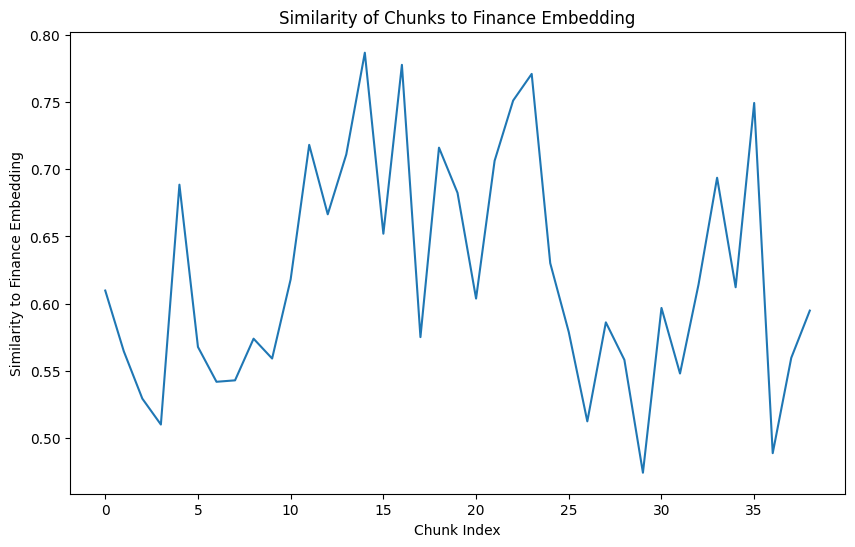

In [ ]:
# prompt: plot the similarity of each chunk and finance_emb
finance_emb = embedding_model.encode('股市 金融 商業 AI 利潤 投資 大盤 股票 策略 漲幅 跌幅 政策 動能 技術')
similarities = cosine_similarity(chunks_emb, finance_emb.reshape(1, -1))

plt.figure(figsize=(10, 6))
plt.plot(similarities)
plt.xlabel("Chunk Index")
plt.ylabel("Similarity to Finance Embedding")
plt.title("Similarity of Chunks to Finance Embedding")
plt.show()